In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [2]:
df = pd.read_csv("../data/raw/dataset.csv")

In [3]:
df.head(5)

,id,name,artists,duration_ms,release_date,year,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,mode,key,popularity,explicit
0,0gNNToCW3qjabgTyBSjt3H,!Que Vida! - Mono Version,['Love'],220560,11/1/66,1966,0.5250,0.600,0.540,0.00305,0.100,-11.803,0.0328,125.898,0.547,1,9,26,0
1,0tMgFpOrXZR6irEOLNWwJL,"""40""",['U2'],157840,2/28/83,1983,0.2280,0.368,0.480,0.70700,0.159,-11.605,0.0306,150.166,0.338,1,8,21,0
2,2ZywW3VyVx6rrlrX75n3JB,"""40"" - Live",['U2'],226200,8/20/83,1983,0.0998,0.272,0.684,0.01450,0.946,-9.728,0.0505,143.079,0.279,1,8,41,0
3,6DdWA7D1o5TU2kXWyCLcch,"""40"" - Remastered 2008",['U2'],157667,2/28/83,1983,0.1850,0.371,0.545,0.58200,0.183,-9.315,0.0307,150.316,0.310,1,8,37,0
4,3vMmwsAiLDCfyc1jl76lQE,"""40"" - Remastered 2008",['U2'],157667,2/28/83,1983,0.1850,0.371,0.545,0.58200,0.183,-9.315,0.0307,150.316,0.310,1,8,35,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 169907 entries, 0 to 169906
Data columns (total 19 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   id                169907 non-null  object 
 1   name              169907 non-null  object 
 2   artists           169907 non-null  object 
 3   duration_ms       169907 non-null  int64  
 4   release_date      169907 non-null  object 
 5   year              169907 non-null  int64  
 6   acousticness      169907 non-null  float64
 7   danceability      169907 non-null  float64
 8   energy            169907 non-null  float64
 9   instrumentalness  169907 non-null  float64
 10  liveness          169907 non-null  float64
 11  loudness          169907 non-null  float64
 12  speechiness       169907 non-null  float64
 13  tempo             169907 non-null  float64
 14  valence           169907 non-null  float64
 15  mode              169907 non-null  int64  
 16  key               16

In [5]:
df.describe()

,duration_ms,year,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,mode,key,popularity,explicit
count,1.699070e+05,169907.000000,169907.000000,169907.000000,169907.000000,169907.000000,169907.000000,169907.000000,169907.000000,169907.000000,169907.000000,169907.000000,169907.000000,169907.000000,169907.000000
mean,2.314071e+05,1977.223234,0.493217,0.538147,0.488591,0.161939,0.206692,-11.370311,0.094058,116.947850,0.532091,0.708552,5.200498,31.556681,0.084864
std,1.213223e+05,25.593318,0.376628,0.175345,0.267391,0.309330,0.176797,5.666795,0.149938,30.727079,0.262407,0.454431,3.515272,21.582730,0.278680
min,5.108000e+03,1921.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-60.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.710400e+05,1957.000000,0.094500,0.417000,0.263000,0.000000,0.098400,-14.470000,0.034900,93.516000,0.322000,0.000000,2.000000,12.000000,0.000000
50%,2.086000e+05,1978.000000,0.492000,0.548000,0.481000,0.000204,0.135000,-10.474000,0.045000,114.777000,0.544000,1.000000,5.000000,33.000000,0.000000
75%,2.629665e+05,1999.000000,0.888000,0.667000,0.710000,0.086800,0.263000,-7.118000,0.075400,135.712000,0.749000,1.000000,8.000000,48.000000,0.000000
max,5.403500e+06,2020.000000,0.996000,0.988000,1.000000,1.000000,1.000000,3.855000,0.969000,244.091000,1.000000,1.000000,11.000000,100.000000,1.000000


#### Variable objetivo

Extraemos la variable objetivo, la década, ya que no está implícitamente creada en el dataset.

In [6]:
df['decade'] = (df['year'] // 10) * 10

In [7]:
print(df[['year', 'decade']].head(10))

   year  decade
0  1966    1960
1  1983    1980
2  1983    1980
3  1983    1980
4  1983    1980
5  2012    2010
6  1966    1960
7  1961    1960
8  1946    1940
9  1952    1950


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 169907 entries, 0 to 169906
Data columns (total 20 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   id                169907 non-null  object 
 1   name              169907 non-null  object 
 2   artists           169907 non-null  object 
 3   duration_ms       169907 non-null  int64  
 4   release_date      169907 non-null  object 
 5   year              169907 non-null  int64  
 6   acousticness      169907 non-null  float64
 7   danceability      169907 non-null  float64
 8   energy            169907 non-null  float64
 9   instrumentalness  169907 non-null  float64
 10  liveness          169907 non-null  float64
 11  loudness          169907 non-null  float64
 12  speechiness       169907 non-null  float64
 13  tempo             169907 non-null  float64
 14  valence           169907 non-null  float64
 15  mode              169907 non-null  int64  
 16  key               16

In [9]:
df.describe()

,duration_ms,year,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,mode,key,popularity,explicit,decade
count,1.699070e+05,169907.000000,169907.000000,169907.000000,169907.000000,169907.000000,169907.000000,169907.000000,169907.000000,169907.000000,169907.000000,169907.000000,169907.000000,169907.000000,169907.000000,169907.000000
mean,2.314071e+05,1977.223234,0.493217,0.538147,0.488591,0.161939,0.206692,-11.370311,0.094058,116.947850,0.532091,0.708552,5.200498,31.556681,0.084864,1972.695004
std,1.213223e+05,25.593318,0.376628,0.175345,0.267391,0.309330,0.176797,5.666795,0.149938,30.727079,0.262407,0.454431,3.515272,21.582730,0.278680,25.649952
min,5.108000e+03,1921.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-60.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1920.000000
25%,1.710400e+05,1957.000000,0.094500,0.417000,0.263000,0.000000,0.098400,-14.470000,0.034900,93.516000,0.322000,0.000000,2.000000,12.000000,0.000000,1950.000000
50%,2.086000e+05,1978.000000,0.492000,0.548000,0.481000,0.000204,0.135000,-10.474000,0.045000,114.777000,0.544000,1.000000,5.000000,33.000000,0.000000,1970.000000
75%,2.629665e+05,1999.000000,0.888000,0.667000,0.710000,0.086800,0.263000,-7.118000,0.075400,135.712000,0.749000,1.000000,8.000000,48.000000,0.000000,1990.000000
max,5.403500e+06,2020.000000,0.996000,0.988000,1.000000,1.000000,1.000000,3.855000,0.969000,244.091000,1.000000,1.000000,11.000000,100.000000,1.000000,2020.000000


Exploramos la distribución de la variable objetivo

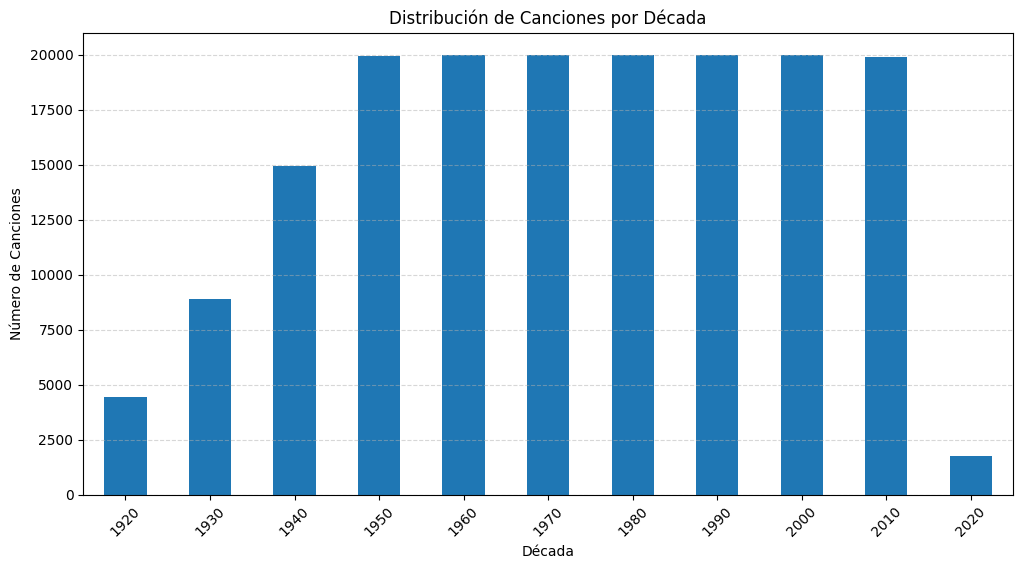

In [10]:
plt.figure(figsize=(12, 6))
df['decade'].value_counts().sort_index().plot(kind='bar')
plt.title('Distribución de Canciones por Década')
plt.xlabel('Década')
plt.ylabel('Número de Canciones')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()

La distribución muestra una buena representación de la mayoría de las décadas (especialmente desde 1950 hasta 2010), excepto algunas (como las décadas de 1920 y 1930) que tienen menos canciones, y la década de 2020, que parece tener una cantidad considerablemente menor.

#### Variables númericas

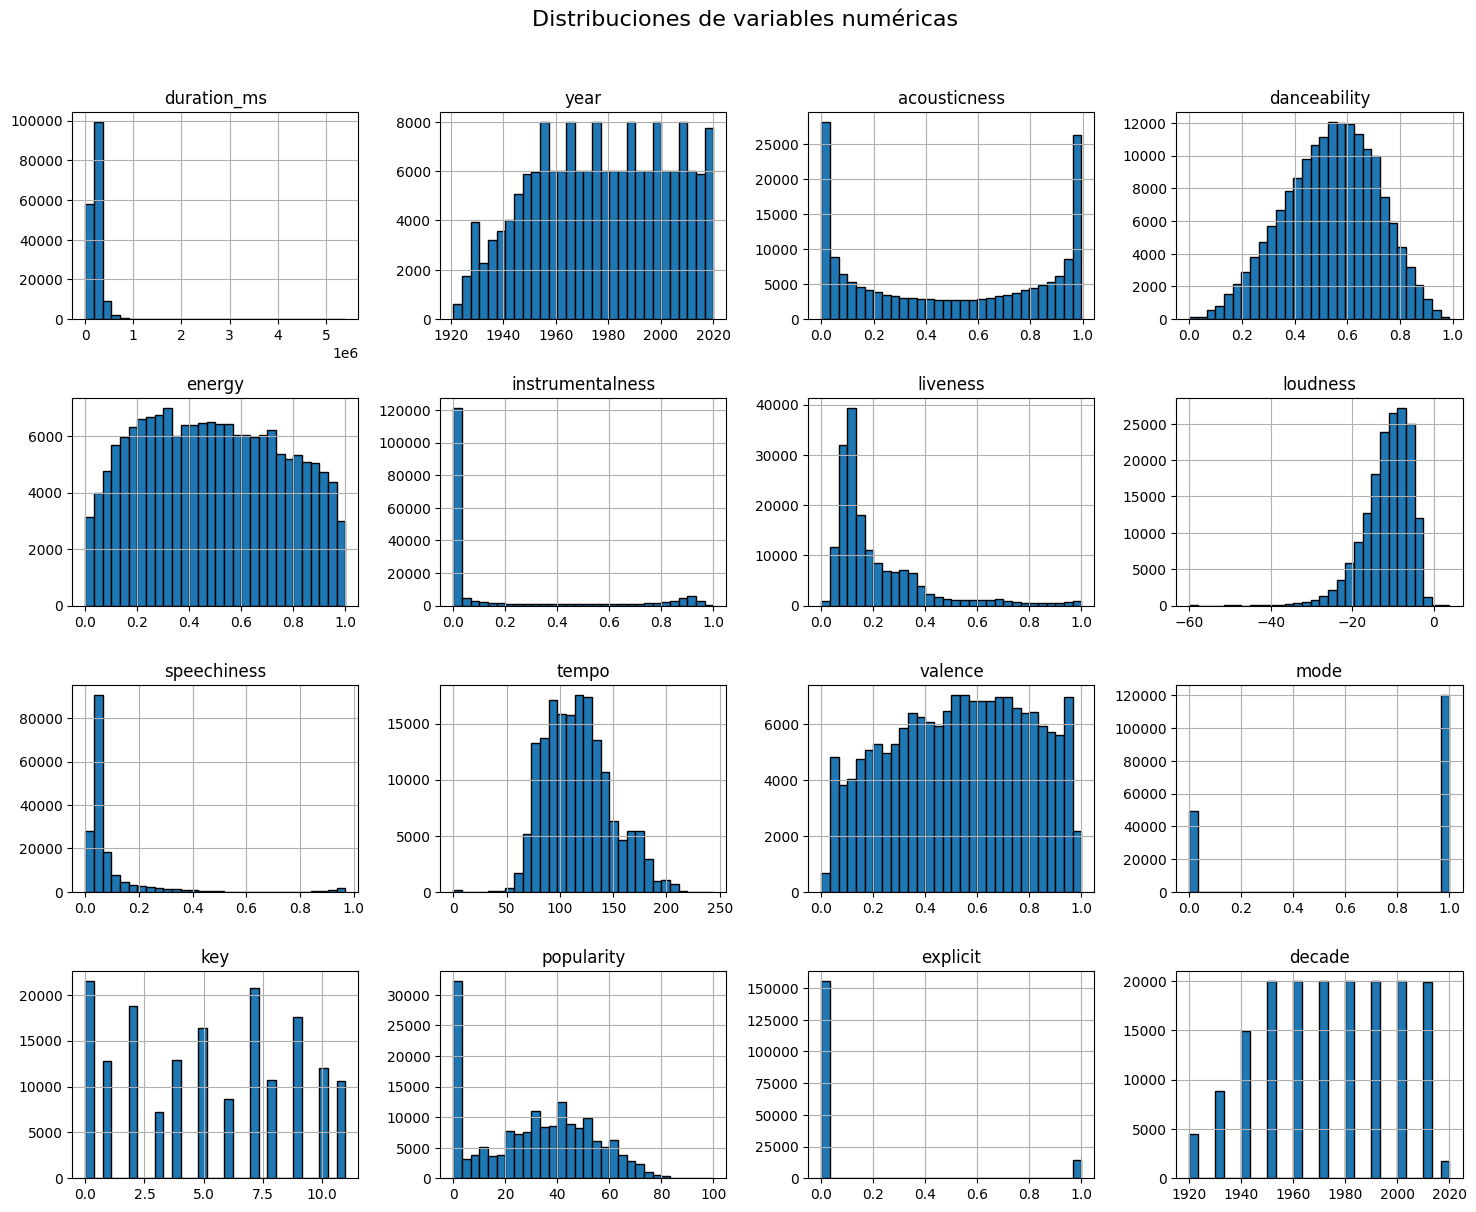

In [11]:
df.hist(figsize=(15, 15), bins=30, edgecolor='black', layout=(5, 4))
plt.suptitle('Distribuciones de variables numéricas', fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

#### Variables categóricas


Análisis de la columna categórica 'name':
Número de categorías únicas: 132938
Categorías más comunes:
name
Summertime    62
Overture      43
Home          40
Stay          34
You           33
Name: count, dtype: int64


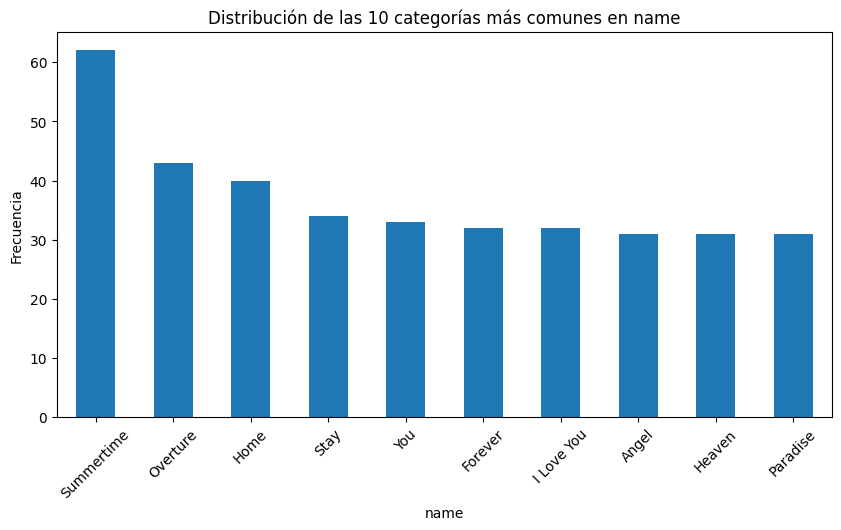


Análisis de la columna categórica 'artists':
Número de categorías únicas: 33375
Categorías más comunes:
artists
['Эрнест Хемингуэй']     1215
['Francisco Canaro']      938
['Эрих Мария Ремарк']     781
['Ignacio Corsini']       620
['Frank Sinatra']         592
Name: count, dtype: int64


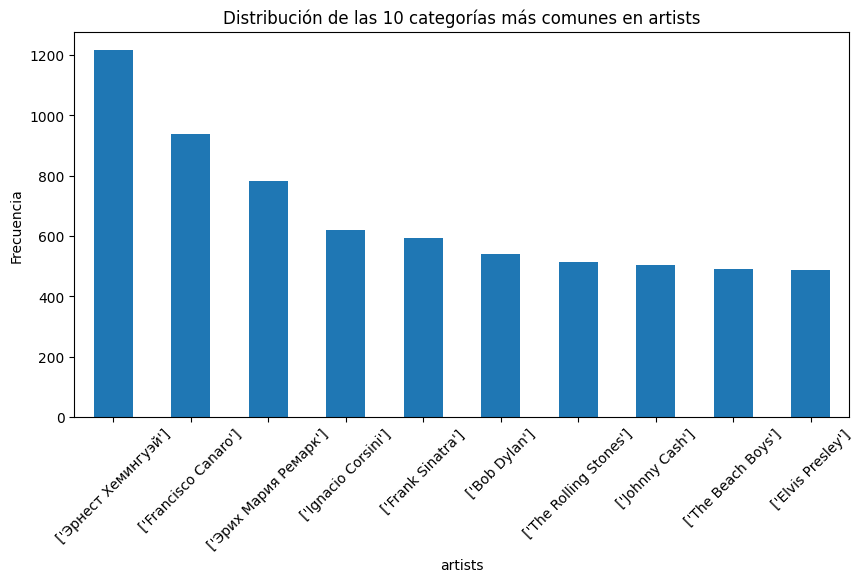


Análisis de la columna categórica 'release_date':
Número de categorías únicas: 10882
Categorías más comunes:
release_date
1945      1449
1949      1254
1935      1123
1948      1052
1/1/30    1047
Name: count, dtype: int64


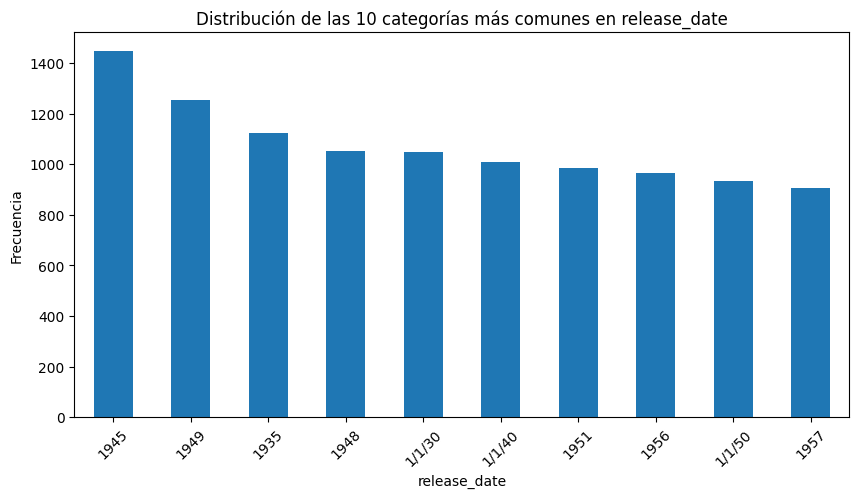

In [12]:
cat_cols = [col for col in df.select_dtypes(include=['object']).columns if col != 'id']
for col in cat_cols:
    print(f"\nAnálisis de la columna categórica '{col}':")
    print(f"Número de categorías únicas: {df[col].nunique()}")
    print(f"Categorías más comunes:\n{df[col].value_counts().head()}")
    
    plt.figure(figsize=(10, 5))
    df[col].value_counts().head(10).plot(kind='bar')
    plt.title(f"Distribución de las 10 categorías más comunes en {col}")
    plt.xlabel(col)
    plt.ylabel('Frecuencia')
    plt.xticks(rotation=45)
    plt.show()

De este análisis podemos extraer varias observaciones:

- La columna name tiene un número extremadamente alto de categorías únicas. Esto indica que probablemente cada canción tiene un nombre único o casi único. No obstante, el nº total de registros es 169907 y la columna name extrae un valor de registros únicos de 132938 lo que puede indicar duplicidades de canciones, aunque tengan IDs diferentes. Será algo a explorar. No obstante, esta columna podría no ser útil para el modelo, ya que el nombre de una canción no aporta información relevante para la predicción de la década.

- Aunque el número de categorías es elevado en la columna artist, es posible que haya información útil en esta columna, ya que ciertos artistas podrían estar asociados en su mayor parte con una década específica.

- La columna release_date tiene muchas categorías (10.882) y no es útil para el enfoque del proyecto. Ya se utilizó la columna year para el cálculo de la década.


A continuación se va a realizar un Frequent Label Encoding para calcular la frecuencia de cada artista en la columna artists. Es cierto que, a priori, no será una información especialmente relevante para el modelo por varios motivos. En primer lugar porque lo que queremos es clasificar canciones. En segundo lugar porque aunque el dataset contine muchos registros, no están todas y cada una de las canciones publicadas en cada una de las décas, sino que contamos con un sesgo de extracción al utilizar un dataset de terceros. Y en tercer lugar porque un artista ha podido sacar canciones en diferentes décadas. No obstante, calcularemos Frequent Label Encoding para produndizar en su análisis y ver cómo se comporta dicha variable estadísticamente.

In [13]:
#Frequent Label Encoding (artist)

artist_counts = df['artists'].value_counts()
df['artists_frequency'] = df['artists'].map(artist_counts)

#### Duplicidades

In [14]:
duplicados_exactos = df[df.duplicated()]
print(f"Número de duplicados exactos: {duplicados_exactos.shape[0]}")

Número de duplicados exactos: 0


Es razonable concluir que las duplicidades (canciones con el mismo nombre pero distinto IDs) se corresponden a canciones con el mismo nombre pero totalmente diferentes o, incluso, a versiones diferentes de la misma canción. Puede haber múltiples versiones de una canción, como versiones en vivo, remixes, grabaciones de estudio, etc. Vamos a comprobar que esto es así.

In [15]:
def asignar_version(nombre):
    if 'remix' in nombre.lower():
        return 'Remix'
    elif 'remastered' in nombre.lower():
        return 'Remaster'
    elif 'live' in nombre.lower():
        return 'Live'
    else:
        return 'Original'

df['version_type'] = df['name'].apply(asignar_version)

In [16]:
df['base_name'] = df['name'].str.replace(r'(?i)(remix|remastered|live)', '', regex=True).str.strip()

versiones_diferentes = df[df.duplicated(subset='base_name', keep=False)]

versiones_diferentes = versiones_diferentes.sort_values(by='base_name')
print("Canciones con diferentes versiones:")
print(versiones_diferentes[['base_name', 'name', 'artists', 'release_date']])


Canciones con diferentes versiones:
                                                base_name  \
3                                            "40" -  2008   
4                                            "40" -  2008   
13      "Carmen Fantasie", by Franz Waxman, based on t...   
14      "Carmen Fantasie", by Franz Waxman, based on t...   
51                       "The Take Over, The Breaks Over"   
...                                                   ...   
169871                                                鴛鴦夢   
169874                                                 黃昏   
169875                                                 黃昏   
169877                                              黃葉舞秋風   
169878                                              黃葉舞秋風   

                                                     name  \
3                                  "40" - Remastered 2008   
4                                  "40" - Remastered 2008   
13      "Carmen Fantasie", by Franz Waxman, base

Conclusión: dado que se trata de una análisis de canciones, sin ninguna prioridad hacia canciones originales, en directo, en estudio, etc. Se mantendrán todos los registros.

Dado que deberemos probar entre diferentes modelos y cada uno de ellos trata mejor los datos de una forma diferente, procederemos a hacer Label Encoding y Dummies para la nueva columna creada de version_type. Para cada uno utilizaremos unas variables dependiendo de lo que sea más adecuado.

In [17]:
#Dummies

dummies = pd.get_dummies(df['version_type'], prefix='version', dtype=int)
df = pd.concat([df, dummies], axis=1)

In [19]:
#Label encoding

le = LabelEncoder()
df['version_type_encoded'] = le.fit_transform(df['version_type'])

In [20]:
df.columns

Index(['id', 'name', 'artists', 'duration_ms', 'release_date', 'year',
       'acousticness', 'danceability', 'energy', 'instrumentalness',
       'liveness', 'loudness', 'speechiness', 'tempo', 'valence', 'mode',
       'key', 'popularity', 'explicit', 'decade', 'artists_frequency',
       'version_type', 'base_name', 'version_Live', 'version_Original',
       'version_Remaster', 'version_Remix', 'version_type_encoded'],
      dtype='object')

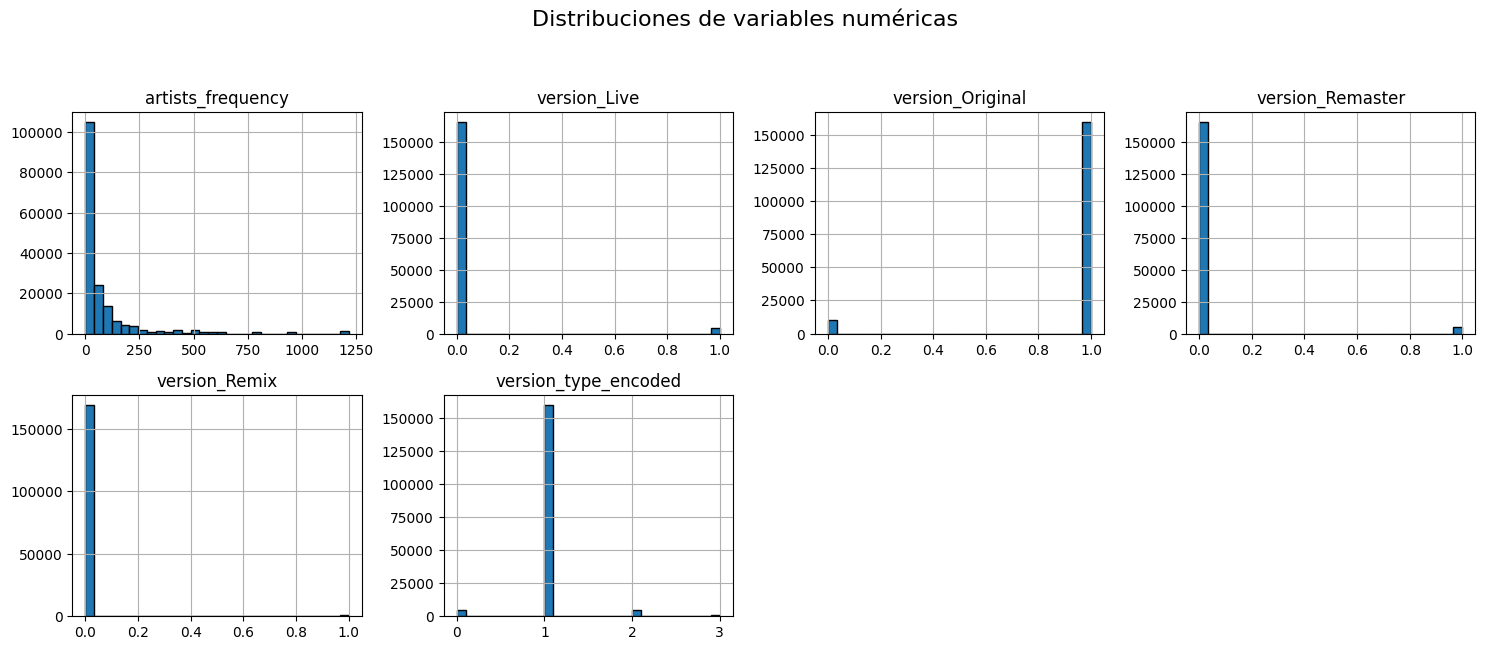

In [21]:
df[['artists_frequency','version_type', 
    'base_name', 'version_Live', 
    'version_Original', 'version_Remaster', 
    'version_Remix', 'version_type_encoded']].hist(figsize=(15, 15), bins=30, edgecolor='black', layout=(5, 4))
plt.suptitle('Distribuciones de variables numéricas', fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

 Las variables dummies tienen un sesgo hacia 0, lo que significa que la mayoría de las canciones no son versiones en vivo, remasterizadas o remixes. Esto podría ser útil en el análisis para identificar tipos de canciones más raras, pero hay que evaluar si estas variables tienen suficiente peso en la predicción de la variable objetivo, ya que el objetivo del estudio es la clasificación por décadas.

 Esto también se aprecia en la variable version_type_encoded que tiene una distribución muy sesgada, lo que puede limitar su capacidad de contribuir al modelo al no haber un número suficiente de ejemplos de Remix o Remaster.

 Por lo tanto, y aunque se explorará más adelante, es posible sospechar que estas variables no contribuirán de forma clara al modelo. 

#### Correlaciones

In [22]:
df.corr(numeric_only=True)

,duration_ms,year,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,...,key,popularity,explicit,decade,artists_frequency,version_Live,version_Original,version_Remaster,version_Remix,version_type_encoded
duration_ms,1.000000,0.076293,-0.079316,-0.134491,0.036400,0.084811,0.034265,-0.014685,-0.058452,-0.028813,...,-0.003112,0.063290,-0.043813,0.076270,-0.114621,0.103495,-0.080583,0.006626,0.017834,-0.046704
year,0.076293,1.000000,-0.624552,0.203433,0.532420,-0.291571,-0.055839,0.490118,-0.120937,0.137893,...,0.012503,0.880725,0.245227,0.993476,-0.300514,-0.009829,0.008389,-0.034058,0.068918,0.022914
acousticness,-0.079316,-0.624552,1.000000,-0.265943,-0.750282,0.335818,-0.023876,-0.567071,-0.056080,-0.204979,...,-0.021683,-0.593349,-0.253693,-0.619742,0.055413,-0.020878,0.043706,-0.012691,-0.065690,-0.030889
danceability,-0.134491,0.203433,-0.265943,1.000000,0.220561,-0.281424,-0.105522,0.294168,0.225314,-0.004880,...,0.022591,0.221085,0.241900,0.200908,0.052554,-0.074101,0.064581,-0.045678,0.054758,0.045817
energy,0.036400,0.532420,-0.750282,0.220561,1.000000,-0.287689,0.126299,0.782982,-0.045224,0.249933,...,0.029980,0.497492,0.142680,0.531824,-0.149222,0.053431,-0.066545,0.018641,0.054930,0.009622
instrumentalness,0.084811,-0.291571,0.335818,-0.281424,-0.287689,1.000000,-0.047402,-0.417032,-0.115737,-0.107568,...,-0.014264,-0.299832,-0.138294,-0.288850,0.000397,-0.009958,0.008772,0.008281,-0.024398,-0.002517
liveness,0.034265,-0.055839,-0.023876,-0.105522,0.126299,-0.047402,1.000000,0.052987,0.147665,0.008128,...,-0.000102,-0.075295,0.039269,-0.054531,0.078322,0.386896,-0.260197,-0.000491,-0.008099,-0.229977
loudness,-0.014685,0.490118,-0.567071,0.294168,0.782982,-0.417032,0.052987,1.000000,-0.105795,0.211113,...,0.021918,0.466548,0.152697,0.489214,-0.145021,-0.007143,-0.020678,0.011456,0.055808,0.041129
speechiness,-0.058452,-0.120937,-0.056080,0.225314,-0.045224,-0.115737,0.147665,-0.105795,1.000000,-0.010068,...,0.015228,-0.135708,0.413074,-0.121997,0.375040,0.012144,0.014610,-0.040129,0.015196,-0.022543
tempo,-0.028813,0.137893,-0.204979,-0.004880,0.249933,-0.107568,0.008128,0.211113,-0.010068,1.000000,...,0.003145,0.135049,0.011485,0.137068,-0.004494,0.013539,-0.018221,0.008761,0.009408,0.002381


In [28]:
decade_col = df['decade']
df = df.drop(columns=['decade'])
df['decade'] = decade_col

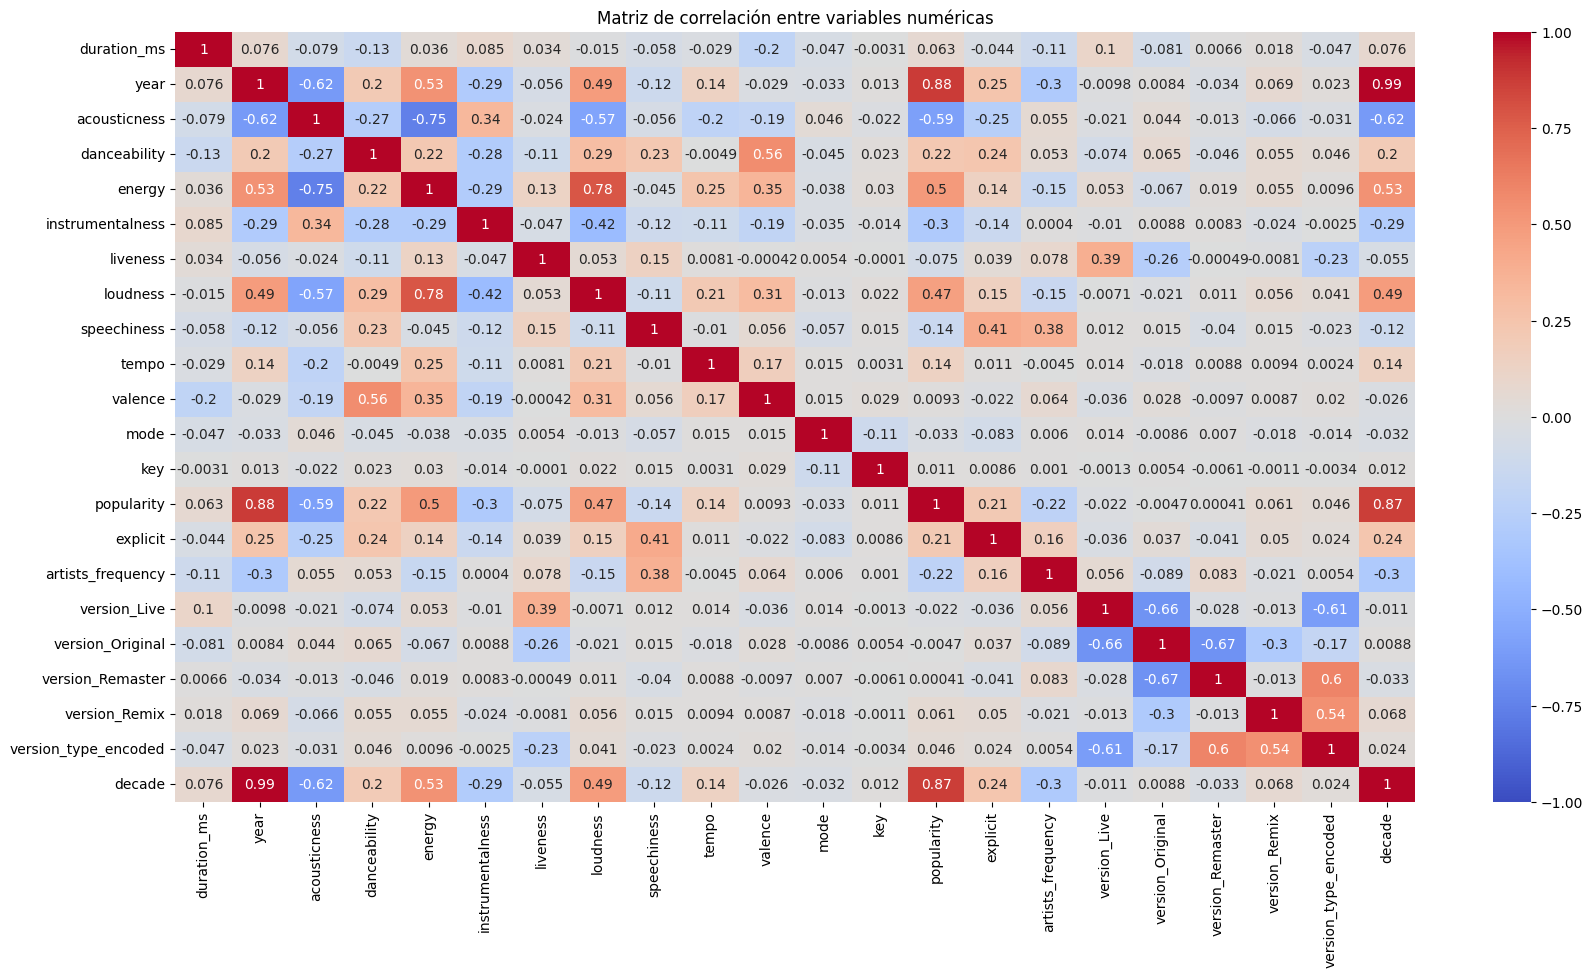

In [29]:
plt.figure(figsize=(20, 10))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Matriz de correlación entre variables numéricas')
plt.show()

In [27]:
df.corr(numeric_only=True)["decade"].sort_values(ascending=False)

decade                  1.000000
year                    0.993476
popularity              0.871549
energy                  0.531824
loudness                0.489214
explicit                0.241324
danceability            0.200908
tempo                   0.137068
duration_ms             0.076270
version_Remix           0.068120
version_type_encoded    0.023687
key                     0.012308
version_Original        0.008772
version_Live           -0.010960
valence                -0.026276
mode                   -0.032455
version_Remaster       -0.033133
liveness               -0.054531
speechiness            -0.121997
instrumentalness       -0.288850
artists_frequency      -0.302515
acousticness           -0.619742
Name: decade, dtype: float64

Variables con correlación positiva:
- La variable *year* tiene una correlación muy alta con decade (0.99). Esto es esperable, ya que la década se deriva del año.
- La variable *popularity* muestra una correlación positiva significativa con decade (0.87), lo que sugiere que las canciones más populares podrían estar asociadas con décadas más recientes.
- *energy* también tiene una correlación positiva notable (0.53), lo que podría indicar que las canciones con más energía tienden a pertenecer a décadas más recientes.

Variables con correlación negativa:
- *acousticness* presenta una correlación negativa moderada (-0.62), lo que sugiere que las canciones más antiguas tienden a ser más acústicas.
- *instrumentalness* tiene una correlación negativa débil (-0.29), lo que podría significar que las canciones más antiguas tienden a ser más instrumentales.
- La variable *artists_frequency* presenta una correlación negativa moderada de -0.302515 con la variable decade, lo que sugiere que los artistas que tienen un mayor número de canciones en el dataset están más asociados con décadas pasadas. **No obstante, conviene manejar esto con atención ya que el dataset es una selección (sesgada) de canciones y artistas y no refleja el total de registros publicados en la historia.**  


In [ ]:
#df.to_csv("processed_new_columns.csv")